### 1. 데이터 불러오기

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures 
from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from eli5.sklearn import PermutationImportance
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix
from bayes_opt import BayesianOptimization
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
import warnings
warnings.filterwarnings(action='ignore')

In [49]:
df_15 = pd.read_csv('players_15.csv')
df_16 = pd.read_csv('players_16.csv')
df_17 = pd.read_csv('players_17.csv')
df_18 = pd.read_csv('players_18.csv')
df_19 = pd.read_csv('players_19.csv')
df_20 = pd.read_csv('players_20.csv')
df_21 = pd.read_csv('players_21.csv')
df_22 = pd.read_csv('players_22.csv')

In [112]:
print(df_15.shape,df_16.shape,df_17.shape,df_18.shape,df_19.shape,df_20.shape,df_21.shape,df_22.shape)
pd.set_option('display.max_columns', None)
df_15.head()

(15844, 110) (15390, 110) (17286, 110) (17713, 110) (17844, 110) (18233, 110) (18707, 110) (19165, 110)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,1987-06-24,169,67,241.0,FC Barcelona,Spain Primera Division,1.0,CF,10.0,NaN,2004-07-01,2018.0,52,Argentina,1369.0,CF,10.0,Left,3,4,5,Medium/Low,Normal (170-),Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...","Finesse Shot, Speed Dribbler (AI), One Club Pl...",93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,NaN,25,21,20,6,11,15,14,8,NaN,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,1985-02-05,185,80,243.0,Real Madrid CF,Spain Primera Division,1.0,LW,7.0,NaN,2009-07-01,2018.0,38,Portugal,1354.0,LW,7.0,Right,4,5,5,High/Low,Normal (185+),Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,NaN,22,31,23,7,11,15,14,11,NaN,91+1,91+1,91+1,89+3,91+1,91+1,91+1,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,1984-01-23,180,80,21.0,FC Bayern München,German 1. Bundesliga,1.0,SUB,10.0,NaN,2009-08-28,2017.0,34,Netherlands,105035.0,RS,11.0,Left,2,4,5,High/Low,Normal (170-185),Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Diver, Injury Prone, Avoids Using Weaker Foot,...",93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,NaN,84+3,84+3,84+3,88+2,87+3,87+3,87+3,88+2,88+2,88+2,88+2,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,htt

In [51]:
pd.set_option('display.max_seq_items', None)
df_columns = df_15.columns.tolist()
df_columns

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

### 2. EDA

In [52]:
# #결측치 파악
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20

df_15 = df_15.dropna(subset=['value_eur'])
df_16 = df_16.dropna(subset=['value_eur'])
df_17 = df_17.dropna(subset=['value_eur'])
df_18 = df_18.dropna(subset=['value_eur'])
df_19 = df_19.dropna(subset=['value_eur'])
df_20 = df_20.dropna(subset=['value_eur'])
df_21 = df_21.dropna(subset=['value_eur'])
df_22 = df_22.dropna(subset=['value_eur'])

#GK 데이터 분리
df_15_fl = df_15[df_15['player_positions'] != 'GK'].copy()
df_16_fl = df_16[df_16['player_positions'] != 'GK'].copy()
df_17_fl = df_17[df_17['player_positions'] != 'GK'].copy()
df_18_fl = df_18[df_18['player_positions'] != 'GK'].copy()
df_19_fl = df_19[df_19['player_positions'] != 'GK'].copy()
df_20_fl = df_20[df_20['player_positions'] != 'GK'].copy()
df_21_fl = df_21[df_21['player_positions'] != 'GK'].copy()
df_22_fl = df_22[df_22['player_positions'] != 'GK'].copy()

df_15_gk = df_15[df_15['player_positions'] == 'GK'].copy()
df_16_gk = df_16[df_16['player_positions'] == 'GK'].copy()
df_17_gk = df_17[df_17['player_positions'] == 'GK'].copy()
df_18_gk = df_18[df_18['player_positions'] == 'GK'].copy()
df_19_gk = df_19[df_19['player_positions'] == 'GK'].copy()
df_20_gk = df_20[df_20['player_positions'] == 'GK'].copy()
df_21_gk = df_21[df_21['player_positions'] == 'GK'].copy()
df_22_gk = df_22[df_22['player_positions'] == 'GK'].copy()

# print(df_15_gk.shape,df_16_gk.shape,df_17_gk.shape,df_18_gk.shape,df_19_gk.shape,df_20_gk.shape,df_21_gk.shape,df_22_gk.shape)
# print(df_15_fl.shape,df_16_fl.shape,df_17_fl.shape,df_18_fl.shape,df_19_fl.shape,df_20_fl.shape,df_21_fl.shape,df_22_fl.shape)

#feature engineering
drop_columns = ['player_url','short_name','long_name','wage_eur','dob','height_cm','weight_kg',
                'club_team_id','club_name','league_name','club_position','club_jersey_number','player_positions',
                'club_loaned_from','club_joined','club_contract_valid_until','nationality_name','nationality_id',
                'nation_team_id','nation_position','nation_jersey_number','preferred_foot','player_traits',
                'international_reputation','work_rate','real_face','release_clause_eur','player_tags',
                'player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','mentality_composure',
                'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb',
                'ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']

# df_list = [df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22]
df_fl_list = [df_15_fl, df_16_fl, df_17_fl, df_18_fl, df_19_fl, df_20_fl, df_21_fl, df_22_fl]
df_gk_list = [df_15_gk, df_16_gk, df_17_gk, df_18_gk, df_19_gk, df_20_gk, df_21_gk, df_22_gk]

# for df in df_list:
#     df['bmi'] = df['weight_kg']/((df['height_cm']/100)**2)
#     df.drop(drop_columns, axis=1, inplace=True)

for df_fl in df_fl_list:
    df_fl['bmi'] = df_fl['weight_kg']/((df_fl['height_cm']/100)**2)
    df_fl.drop(drop_columns, axis=1, inplace=True)
    df_fl.drop(['goalkeeping_speed'], axis=1, inplace=True)
    df_fl.fillna(4,inplace=True)

for df_gk in df_gk_list:
    df_gk['bmi'] = df_gk['weight_kg']/((df_gk['height_cm']/100)**2)
    df_gk.drop(drop_columns, axis=1, inplace=True)
    df_gk.drop(['pace','shooting','passing','dribbling','defending','physic'], axis=1, inplace=True)
    df_gk.fillna(4,inplace=True)

In [53]:
#필드플레이어 전체 데이터 결측치 확인
df_15_fl_isnull = pd.DataFrame({'df_15_fl':df_15_fl.isnull().sum()})
df_16_fl_isnull = pd.DataFrame({'df_16_fl':df_16_fl.isnull().sum()})
df_17_fl_isnull = pd.DataFrame({'df_17_fl':df_17_fl.isnull().sum()})
df_18_fl_isnull = pd.DataFrame({'df_18_fl':df_18_fl.isnull().sum()})
df_19_fl_isnull = pd.DataFrame({'df_19_fl':df_19_fl.isnull().sum()})
df_20_fl_isnull = pd.DataFrame({'df_20_fl':df_20_fl.isnull().sum()})
df_21_fl_isnull = pd.DataFrame({'df_21_fl':df_21_fl.isnull().sum()})
df_22_fl_isnull = pd.DataFrame({'df_22_fl':df_22_fl.isnull().sum()})

total_fl_isnull = pd.concat([df_15_fl_isnull, df_16_fl_isnull, df_17_fl_isnull, df_18_fl_isnull,
                          df_19_fl_isnull, df_20_fl_isnull, df_21_fl_isnull, df_22_fl_isnull,], axis=1)

pd.set_option('display.max_rows', None)
total_fl_isnull

,df_15_fl,df_16_fl,df_17_fl,df_18_fl,df_19_fl,df_20_fl,df_21_fl,df_22_fl
sofifa_id,0,0,0,0,0,0,0,0
overall,0,0,0,0,0,0,0,0
potential,0,0,0,0,0,0,0,0
value_eur,0,0,0,0,0,0,0,0
age,0,0,0,0,0,0,0,0
league_level,0,0,0,0,0,0,0,0
weak_foot,0,0,0,0,0,0,0,0
skill_moves,0,0,0,0,0,0,0,0
body_type,0,0,0,0,0,0,0,0
pace,0,0,0,0,0,0,0,0


In [54]:
#골키퍼 전체 데이터 결측치 확인
df_15_gk_isnull = pd.DataFrame({'df_15_gk':df_15_gk.isnull().sum()})
df_16_gk_isnull = pd.DataFrame({'df_16_gk':df_16_gk.isnull().sum()})
df_17_gk_isnull = pd.DataFrame({'df_17_gk':df_17_gk.isnull().sum()})
df_18_gk_isnull = pd.DataFrame({'df_18_gk':df_18_gk.isnull().sum()})
df_19_gk_isnull = pd.DataFrame({'df_19_gk':df_19_gk.isnull().sum()})
df_20_gk_isnull = pd.DataFrame({'df_20_gk':df_20_gk.isnull().sum()})
df_21_gk_isnull = pd.DataFrame({'df_21_gk':df_21_gk.isnull().sum()})
df_22_gk_isnull = pd.DataFrame({'df_22_gk':df_22_gk.isnull().sum()})

total_gk_isnull = pd.concat([df_15_gk_isnull, df_16_gk_isnull, df_17_gk_isnull, df_18_gk_isnull,
                          df_19_gk_isnull, df_20_gk_isnull, df_21_gk_isnull, df_22_gk_isnull,], axis=1)

pd.set_option('display.max_rows', None)
total_gk_isnull

,df_15_gk,df_16_gk,df_17_gk,df_18_gk,df_19_gk,df_20_gk,df_21_gk,df_22_gk
sofifa_id,0,0,0,0,0,0,0,0
overall,0,0,0,0,0,0,0,0
potential,0,0,0,0,0,0,0,0
value_eur,0,0,0,0,0,0,0,0
age,0,0,0,0,0,0,0,0
league_level,0,0,0,0,0,0,0,0
weak_foot,0,0,0,0,0,0,0,0
skill_moves,0,0,0,0,0,0,0,0
body_type,0,0,0,0,0,0,0,0
attacking_crossing,0,0,0,0,0,0,0,0


In [55]:
pd.options.display.max_rows = 60

#두 데이터 셋에 겹치는 선수들만 선택
df_1517_fl = pd.merge(left = df_15_fl , right = df_17_fl, how = "inner", on = "sofifa_id")
df_1618_fl = pd.merge(left = df_16_fl , right = df_18_fl, how = "inner", on = "sofifa_id")
df_1719_fl = pd.merge(left = df_17_fl , right = df_19_fl, how = "inner", on = "sofifa_id")
df_1820_fl = pd.merge(left = df_18_fl , right = df_20_fl, how = "inner", on = "sofifa_id")
df_1921_fl = pd.merge(left = df_19_fl , right = df_21_fl, how = "inner", on = "sofifa_id")
df_2022_fl = pd.merge(left = df_20_fl , right = df_22_fl, how = "inner", on = "sofifa_id")

df_1517_gk = pd.merge(left = df_15_gk , right = df_17_gk, how = "inner", on = "sofifa_id")
df_1618_gk = pd.merge(left = df_16_gk , right = df_18_gk, how = "inner", on = "sofifa_id")
df_1719_gk = pd.merge(left = df_17_gk , right = df_19_gk, how = "inner", on = "sofifa_id")
df_1820_gk = pd.merge(left = df_18_gk , right = df_20_gk, how = "inner", on = "sofifa_id")
df_1921_gk = pd.merge(left = df_19_gk , right = df_21_gk, how = "inner", on = "sofifa_id")
df_2022_gk = pd.merge(left = df_20_gk , right = df_22_gk, how = "inner", on = "sofifa_id")

df_merge_fl_columns = df_1517_fl.columns.tolist()
df_merge_fl_list = [df_1517_fl, df_1618_fl, df_1719_fl, df_1820_fl, df_1921_fl, df_2022_fl]

df_merge_gk_columns = df_1517_gk.columns.tolist()
df_merge_gk_list = [df_1517_gk, df_1618_gk, df_1719_gk, df_1820_gk, df_1921_gk, df_2022_gk]

for df_fl_merge in df_merge_fl_list:
    df_fl_merge['3y_value_change'] = df_fl_merge['value_eur_y'] - df_fl_merge['value_eur_x']
    dels = [col for col in df_fl_merge.columns if ("_y" in col)]
    df_fl_merge.drop(columns=dels, inplace=True)
    df_fl_merge.drop('value_eur_x', axis=1, inplace=True)

for df_gk_merge in df_merge_gk_list:
    df_gk_merge['3y_value_change'] = df_gk_merge['value_eur_y'] - df_gk_merge['value_eur_x']
    dels = [col for col in df_gk_merge.columns if ("_y" in col)]
    df_gk_merge.drop(columns=dels, inplace=True)
    df_gk_merge.drop('value_eur_x', axis=1, inplace=True)

In [56]:
print(df_1517_fl.shape,df_1618_fl.shape,df_1719_fl.shape,df_1820_fl.shape,df_1921_fl.shape,df_2022_fl.shape)
print(df_1517_gk.shape,df_1618_gk.shape,df_1719_gk.shape,df_1820_gk.shape,df_1921_gk.shape,df_2022_gk.shape)

(8657, 49) (8487, 49) (9460, 49) (9619, 49) (9622, 49) (10005, 49)
(1079, 44) (1047, 44) (1188, 44) (1175, 44) (1206, 44) (1224, 44)


In [57]:
#field player, GK끼리 데이터를 합쳐줌
df_fl = pd.concat(df_merge_fl_list, axis = 0)
df_gk = pd.concat(df_merge_gk_list, axis = 0)

df_fl.drop('sofifa_id',axis=1,inplace=True)
df_gk.drop('sofifa_id',axis=1,inplace=True)

print(df_fl.shape, df_gk.shape)

(55850, 48) (6919, 43)


- 선수의 stat과 2년후(3년동안) 몸값 변화량 과의 관계를 파악함  
- ex) features = 15년도 스탯과, target = 17년도 몸값 - 15년도 몸값  
- <매우중요> 또한 3년주기로 데이터를 끊었기 때문에 똑같은 선수일지라도 각 년도에 따라서 다른 선수로 취급하고 데이터를 분류함
- 15년부터 22년 까지 모든데이터가 존재하는 선수가 3280명 밖에 없음

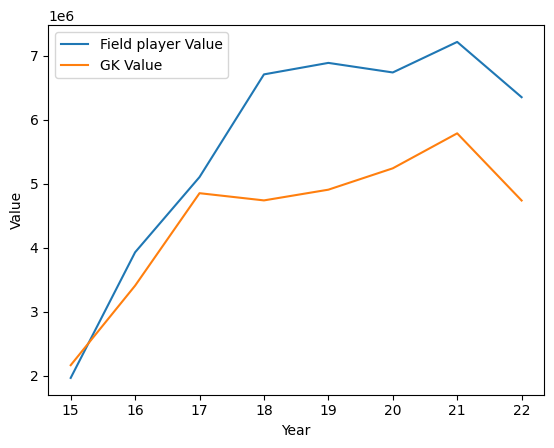

(2883, 9) (397, 9)
15~22년 까지 모든 stat 데이터가 존재하는 선수: 3280


In [58]:
df_15_fl_value = df_15_fl[['sofifa_id','value_eur']].copy()
df_16_fl_value = df_16_fl[['sofifa_id','value_eur']].copy()
df_17_fl_value = df_17_fl[['sofifa_id','value_eur']].copy()
df_18_fl_value = df_18_fl[['sofifa_id','value_eur']].copy()
df_19_fl_value = df_19_fl[['sofifa_id','value_eur']].copy()
df_20_fl_value = df_20_fl[['sofifa_id','value_eur']].copy()
df_21_fl_value = df_21_fl[['sofifa_id','value_eur']].copy()
df_22_fl_value = df_22_fl[['sofifa_id','value_eur']].copy()
						                          
df_15_gk_value = df_15_gk[['sofifa_id','value_eur']].copy()
df_16_gk_value = df_16_gk[['sofifa_id','value_eur']].copy()
df_17_gk_value = df_17_gk[['sofifa_id','value_eur']].copy()
df_18_gk_value = df_18_gk[['sofifa_id','value_eur']].copy()
df_19_gk_value = df_19_gk[['sofifa_id','value_eur']].copy()
df_20_gk_value = df_20_gk[['sofifa_id','value_eur']].copy()
df_21_gk_value = df_21_gk[['sofifa_id','value_eur']].copy()
df_22_gk_value = df_22_gk[['sofifa_id','value_eur']].copy()

#연도별 value 평균값 변화 
df_fl_list = [df_15_fl_value, df_16_fl_value, df_17_fl_value, df_18_fl_value, df_19_fl_value, df_20_fl_value, df_21_fl_value, df_22_fl_value]
df_gk_list = [df_15_gk_value, df_16_gk_value, df_17_gk_value, df_18_gk_value, df_19_gk_value, df_20_gk_value, df_21_gk_value, df_22_gk_value]

num_1_list = [2,3,4,5,6,7]

df_fl_value = pd.merge(left = df_15_fl_value, right = df_16_fl_value, how = "inner", on = "sofifa_id")
df_gk_value = pd.merge(left = df_15_gk_value, right = df_16_gk_value, how = "inner", on = "sofifa_id")

for i in num_1_list:
    df_fl_value = pd.merge(left = df_fl_value , right = df_fl_list[i], how = "inner", on = "sofifa_id")
    df_gk_value = pd.merge(left = df_gk_value , right = df_gk_list[i], how = "inner", on = "sofifa_id")

df_fl_value.columns = ['id','15_fl_value', '16_fl_value', '17_fl_value', '18_fl_value', '19_fl_value', '20_fl_value', '21_fl_value', '22_fl_value']
df_gk_value.columns = ['id','15_gk_value', '16_gk_value', '17_gk_value', '18_gk_value', '19_gk_value', '20_gk_value', '21_gk_value', '22_gk_value']

num_2_list = [1,2,3,4,5,6,7,8]
fl_value_means = []
gk_value_means = []

for i in num_2_list:
    fl_mean = df_fl_value[df_fl_value.columns[i]].mean()
    fl_value_means.append(fl_mean)
    gk_mean = df_gk_value[df_gk_value.columns[i]].mean()
    gk_value_means.append(gk_mean)

sns.lineplot(x=[15,16,17,18,19,20,21,22],
             y=fl_value_means, label='Field player Value')
sns.lineplot(x=[15,16,17,18,19,20,21,22],
             y=gk_value_means, label='GK Value')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

print(df_fl_value.shape,df_gk_value.shape)
print('15~22년 까지 모든 stat 데이터가 존재하는 선수:', df_fl_value.shape[0]+df_gk_value.shape[0])

In [59]:
#Data split
target = '3y_value_change'
fl_feature = df_fl.columns.drop(target).tolist()
gk_feature = df_gk.columns.drop(target).tolist()

train_fl, test_fl = train_test_split(df_fl, train_size=0.8, test_size=0.2, random_state=42)
train_gk, test_gk = train_test_split(df_gk, train_size=0.8, test_size=0.2, random_state=42)

fl_X_train, fl_y_train = train_fl.drop(columns=target), train_fl[target]
fl_X_test, fl_y_test = test_fl.drop(columns=target), test_fl[target]
gk_X_train, gk_y_train = train_gk.drop(columns=target), train_gk[target]
gk_X_test, gk_y_test = test_gk.drop(columns=target), test_gk[target]

print(fl_X_train.shape, fl_y_train.shape, fl_X_test.shape, fl_y_test.shape)
print(gk_X_train.shape, gk_y_train.shape, gk_X_test.shape, gk_y_test.shape)

(44680, 47) (44680,) (11170, 47) (11170,)
(5535, 42) (5535,) (1384, 42) (1384,)


In [60]:
#먼저 encoding
fl_X_train_enc, fl_y_train_enc = fl_X_train.copy(), fl_y_train.copy()
fl_X_test_enc, fl_y_test_enc = fl_X_test.copy(), fl_y_test.copy()
gk_X_train_enc, gk_y_train_enc = gk_X_train.copy(), gk_y_train.copy()
gk_X_test_enc, gk_y_test_enc = gk_X_test.copy(), gk_y_test.copy()
gk_X_train_enc.head(10)

,overall_x,potential_x,age_x,league_level_x,weak_foot_x,skill_moves_x,body_type_x,attacking_crossing_x,attacking_finishing_x,attacking_heading_accuracy_x,...,defending_marking_awareness_x,defending_standing_tackle_x,defending_sliding_tackle_x,goalkeeping_diving_x,goalkeeping_handling_x,goalkeeping_kicking_x,goalkeeping_positioning_x,goalkeeping_reflexes_x,goalkeeping_speed_x,bmi_x
26,81,81,30,1.0,2,1,Normal (185+),25,25,25,...,25,25,25,79,78,75,83,85,43.0,24.414062
170,74,74,33,2.0,3,1,Normal (185+),11,12,14,...,12,12,12,76,74,67,70,77,41.0,25.492722
63,77,80,27,1.0,5,1,Normal (170-185),25,25,25,...,25,25,25,78,75,85,77,79,61.0,24.724520
1044,51,61,18,1.0,3,1,Normal (170-185),25,25,25,...,25,25,25,50,51,56,49,51,41.0,23.888441
468,68,69,29,1.0,3,1,Normal (170-185),15,15,13,...,13,10,17,68,70,71,65,67,42.0,22.839506
1110,55,69,21,4.0,2,1,Lean (185+),16,15,16,...,14,19,12,58,55,55,51,51,45.0,21.301775
227,71,75,26,2.0,2,1,Normal (170-185),25,25,25,...,25,25,25,74,68,71,66,77,46.0,24.691358
632,66,80,20,1.0,3,1,Normal (185+),11,17,14,...,18,16,19,70,60,64,64,67,36.0,22.955684
1011,58,67,22,2.0,2,1,Stocky (170-185),15,15,17,...,18,20,19,54,61,44,61,57,48.0,24.419279
1080,56,75,18,1.0,2,1,Lean (185+),13,15,14,...,17,10,10,59,54,62,53,55,33.0,24.332277


In [61]:
enc_fl = OrdinalEncoder()

fl_X_train_enc = enc_fl.fit_transform(fl_X_train_enc)
fl_X_test_enc = enc_fl.transform(fl_X_test_enc)
gk_X_train_enc.replace({'Stocky (185+)':1,'Lean (170-185)':2,
                       'Normal (185+)':3,'Lean (185+)':5,
                       'Normal (170-185)':6,'Stocky (170-185)':7,
                       'Stocky (170-)':8,'Normal (170-)':9,
                       'Unique':10},inplace=True)
gk_X_test_enc.replace({'Stocky (185+)':1,'Lean (170-185)':2,
                       'Normal (185+)':3,'Lean (185+)':5,
                       'Normal (170-185)':6,'Stocky (170-185)':7,
                       'Stocky (170-)':8,'Normal (170-)':9,
                       'Unique':10},inplace=True)

print(enc_fl.category_mapping)
gk_X_train_enc.head(10)

[{'col': 'body_type_x', 'mapping': Stocky (185+)        1
Lean (170-185)       2
Normal (185+)        3
Lean (170-)          4
Lean (185+)          5
Normal (170-185)     6
Stocky (170-185)     7
Stocky (170-)        8
Normal (170-)        9
Unique              10
NaN                 -2
dtype: int64, 'data_type': dtype('O')}]


,overall_x,potential_x,age_x,league_level_x,weak_foot_x,skill_moves_x,body_type_x,attacking_crossing_x,attacking_finishing_x,attacking_heading_accuracy_x,...,defending_marking_awareness_x,defending_standing_tackle_x,defending_sliding_tackle_x,goalkeeping_diving_x,goalkeeping_handling_x,goalkeeping_kicking_x,goalkeeping_positioning_x,goalkeeping_reflexes_x,goalkeeping_speed_x,bmi_x
26,81,81,30,1.0,2,1,3,25,25,25,...,25,25,25,79,78,75,83,85,43.0,24.414062
170,74,74,33,2.0,3,1,3,11,12,14,...,12,12,12,76,74,67,70,77,41.0,25.492722
63,77,80,27,1.0,5,1,6,25,25,25,...,25,25,25,78,75,85,77,79,61.0,24.724520
1044,51,61,18,1.0,3,1,6,25,25,25,...,25,25,25,50,51,56,49,51,41.0,23.888441
468,68,69,29,1.0,3,1,6,15,15,13,...,13,10,17,68,70,71,65,67,42.0,22.839506
1110,55,69,21,4.0,2,1,5,16,15,16,...,14,19,12,58,55,55,51,51,45.0,21.301775
227,71,75,26,2.0,2,1,6,25,25,25,...,25,25,25,74,68,71,66,77,46.0,24.691358
632,66,80,20,1.0,3,1,3,11,17,14,...,18,16,19,70,60,64,64,67,36.0,22.955684
1011,58,67,22,2.0,2,1,7,15,15,17,...,18,20,19,54,61,44,61,57,48.0,24.419279
1080,56,75,18,1.0,2,1,5,13,15,14,...,17,10,10,59,54,62,53,55,33.0,24.332277


In [62]:
#데이터 분포 확인(분류 모델로 학습할 경우)
df_fl_clf = df_fl.copy()
df_gk_clf = df_gk.copy()

df_fl_clf.loc[df_fl_clf['3y_value_change'] < 1.025000e+06, '3y_value_change'] = 0
df_fl_clf.loc[df_fl_clf['3y_value_change'] >= 1.025000e+06, '3y_value_change'] = 1

df_gk_clf.loc[df_gk_clf['3y_value_change'] < 5.500000e+05, '3y_value_change'] = 0
df_gk_clf.loc[df_gk_clf['3y_value_change'] >= 5.500000e+05, '3y_value_change'] = 1

train_fl_clf, test_fl_clf = train_test_split(df_fl_clf, train_size=0.8, test_size=0.2, random_state=42)
train_gk_clf, test_gk_clf = train_test_split(df_gk_clf, train_size=0.8, test_size=0.2, random_state=42)

fl_X_train_clf, fl_y_train_clf = train_fl_clf.drop(columns=target), train_fl_clf[target]
fl_X_test_clf, fl_y_test_clf = test_fl_clf.drop(columns=target), test_fl_clf[target]
gk_X_train_clf, gk_y_train_clf = train_gk_clf.drop(columns=target), train_gk_clf[target]
gk_X_test_clf, gk_y_test_clf = test_gk_clf.drop(columns=target), test_gk_clf[target]

fl_X_train_clf = enc_fl.transform(fl_X_train_clf)
fl_X_test_clf = enc_fl.transform(fl_X_test_clf)
gk_X_train_clf.replace({'Stocky (185+)':1,'Lean (170-185)':2,
                       'Normal (185+)':3,'Lean (185+)':5,
                       'Normal (170-185)':6,'Stocky (170-185)':7,
                       'Stocky (170-)':8,'Normal (170-)':9,
                       'Unique':10},inplace=True)
gk_X_test_clf.replace({'Stocky (185+)':1,'Lean (170-185)':2,
                       'Normal (185+)':3,'Lean (185+)':5,
                       'Normal (170-185)':6,'Stocky (170-185)':7,
                       'Stocky (170-)':8,'Normal (170-)':9,
                       'Unique':10},inplace=True)

In [96]:
fl_X_train_rf, fl_y_train_rf = fl_X_train_clf.copy(), fl_y_train_clf.copy()
fl_X_test_rf, fl_y_test_rf = fl_X_test_clf.copy(), fl_y_test_clf.copy()
gk_X_train_rf, gk_y_train_rf = gk_X_train_clf.copy(), gk_y_train_clf.copy()
gk_X_test_rf, gk_y_test_rf = gk_X_test_clf.copy(), gk_y_test_clf.copy()

def fl_refine(df):
    df['attacking_x'] = (df['attacking_crossing_x']+df['attacking_finishing_x']+df['attacking_heading_accuracy_x']+df['attacking_short_passing_x']+df['attacking_volleys_x'])/5
    df['skill_x'] = (df['skill_dribbling_x']+df['skill_curve_x']+df['skill_fk_accuracy_x']+df['skill_long_passing_x']+df['skill_ball_control_x'])/5
    df['movement_x'] = (df['movement_acceleration_x']+df['movement_sprint_speed_x']+df['movement_agility_x']+df['movement_reactions_x']+df['movement_balance_x'])/5
    df['power_x'] = (df['power_shot_power_x']+df['power_jumping_x']+df['power_stamina_x']+df['power_strength_x']+df['power_long_shots_x'])/5
    df['mentality_x'] = (df['mentality_aggression_x']+df['mentality_interceptions_x']+df['mentality_positioning_x']+df['mentality_vision_x']+df['mentality_penalties_x'])/5
    df['defending_x'] = (df['defending_marking_awareness_x']+df['defending_standing_tackle_x']+df['defending_sliding_tackle_x'])/3
    df['goalkeeping_x'] = (df['goalkeeping_diving_x']+df['goalkeeping_handling_x']+df['goalkeeping_kicking_x']+df['goalkeeping_positioning_x']+df['goalkeeping_reflexes_x'])/5
    df.drop(['overall_x', 'potential_x', 'league_level_x', 'weak_foot_x', 'bmi_x',
             'attacking_crossing_x', 'attacking_finishing_x', 'attacking_heading_accuracy_x', 'attacking_short_passing_x', 'attacking_volleys_x',
	         'skill_dribbling_x', 'skill_curve_x', 'skill_fk_accuracy_x', 'skill_long_passing_x', 'skill_ball_control_x',
             'movement_acceleration_x', 'movement_sprint_speed_x', 'movement_agility_x', 'movement_reactions_x', 'movement_balance_x',
             'power_shot_power_x', 'power_jumping_x', 'power_stamina_x', 'power_strength_x', 'power_long_shots_x',
	         'mentality_aggression_x', 'mentality_interceptions_x', 'mentality_positioning_x', 'mentality_vision_x', 'mentality_penalties_x',
             'defending_marking_awareness_x', 'defending_standing_tackle_x', 'defending_sliding_tackle_x',
	         'goalkeeping_diving_x', 'goalkeeping_handling_x', 'goalkeeping_kicking_x', 'goalkeeping_positioning_x', 'goalkeeping_reflexes_x'], axis=1, inplace=True)

def gk_refine(df):
    df['attacking_x'] = (df['attacking_crossing_x']+df['attacking_finishing_x']+df['attacking_heading_accuracy_x']+df['attacking_short_passing_x']+df['attacking_volleys_x'])/5
    df['skill_x'] = (df['skill_dribbling_x']+df['skill_curve_x']+df['skill_fk_accuracy_x']+df['skill_long_passing_x']+df['skill_ball_control_x'])/5
    df['movement_x'] = (df['movement_acceleration_x']+df['movement_sprint_speed_x']+df['movement_agility_x']+df['movement_reactions_x']+df['movement_balance_x'])/5
    df['power_x'] = (df['power_shot_power_x']+df['power_jumping_x']+df['power_stamina_x']+df['power_strength_x']+df['power_long_shots_x'])/5
    df['mentality_x'] = (df['mentality_aggression_x']+df['mentality_interceptions_x']+df['mentality_positioning_x']+df['mentality_vision_x']+df['mentality_penalties_x'])/5
    df['defending_x'] = (df['defending_marking_awareness_x']+df['defending_standing_tackle_x']+df['defending_sliding_tackle_x'])/3
    df['goalkeeping_x'] = (df['goalkeeping_diving_x']+df['goalkeeping_handling_x']+df['goalkeeping_kicking_x']+df['goalkeeping_positioning_x']+df['goalkeeping_reflexes_x']+df['goalkeeping_speed_x'])/6
    df.drop(['overall_x', 'potential_x', 'league_level_x', 'weak_foot_x', 'bmi_x',
             'attacking_crossing_x', 'attacking_finishing_x', 'attacking_heading_accuracy_x', 'attacking_short_passing_x', 'attacking_volleys_x',
	         'skill_dribbling_x', 'skill_curve_x', 'skill_fk_accuracy_x', 'skill_long_passing_x', 'skill_ball_control_x',
             'movement_acceleration_x', 'movement_sprint_speed_x', 'movement_agility_x', 'movement_reactions_x', 'movement_balance_x',
             'power_shot_power_x', 'power_jumping_x', 'power_stamina_x', 'power_strength_x', 'power_long_shots_x',
	         'mentality_aggression_x', 'mentality_interceptions_x', 'mentality_positioning_x', 'mentality_vision_x', 'mentality_penalties_x',
             'defending_marking_awareness_x', 'defending_standing_tackle_x', 'defending_sliding_tackle_x',
	         'goalkeeping_diving_x', 'goalkeeping_handling_x', 'goalkeeping_kicking_x', 'goalkeeping_positioning_x', 'goalkeeping_reflexes_x','goalkeeping_speed_x'], axis=1, inplace=True)

fl_refine(fl_X_train_rf)
fl_refine(fl_X_test_rf)
gk_refine(gk_X_train_rf)
gk_refine(gk_X_test_rf)

In [97]:
#전체 dataset 정리

#FL, GK 전체 data
df_fl, df_gk

#encoding X
fl_X_train, fl_y_train
fl_X_test, fl_y_test
gk_X_train, gk_y_train
gk_X_test, gk_y_test

#encoding O, (treebased model(regression))
fl_X_train_enc, fl_y_train_enc
fl_X_test_enc, fl_y_test_enc
gk_X_train_enc, gk_y_train_enc
gk_X_test_enc, gk_y_test_enc

#encoding O, (linear regression, scaling 필요)
fl_X_train_enc, fl_y_train_enc
fl_X_test_enc, fl_y_test_enc
gk_X_train_enc, gk_y_train_enc
gk_X_test_enc, gk_y_test_enc

#encoding O, (treebased model (classification))
fl_X_train_clf, fl_y_train_clf
fl_X_test_clf, fl_y_test_clf
gk_X_train_clf, gk_y_train_clf
gk_X_test_clf, gk_y_test_clf

#encoding O, (treebased model (classification))
fl_X_train_rf, fl_y_train_rf
fl_X_test_rf, fl_y_test_rf
gk_X_train_rf, gk_y_train_rf
gk_X_test_rf, gk_y_test_rf

(     age_x  skill_moves_x  body_type_x  attacking_x  skill_x  movement_x  \
 543     28              1            1         25.2     28.4        51.6   
 741     20              1            3         17.2     17.8        45.4   
 286     29              1            3         20.6     23.0        42.0   
 95      35              1            3         17.2     16.6        47.2   
 58      30              1            3         15.2     18.8        48.2   
 ..     ...            ...          ...          ...      ...         ...   
 310     33              1            2         15.0     14.8        56.8   
 430     35              1            1         20.6     22.2        42.4   
 664     33              1            3         16.2     16.2        36.2   
 757     30              1            7         22.0     25.8        46.6   
 344     25              1            6         19.6     19.8        53.2   
 
      power_x  mentality_x  defending_x  goalkeeping_x  
 543     37.8    

In [110]:
fl_X_train_rf.sample(10)

,age_x,skill_moves_x,body_type_x,pace_x,shooting_x,passing_x,dribbling_x,defending_x,physic_x,attacking_x,skill_x,movement_x,power_x,mentality_x,goalkeeping_x
5728,21,3,2,77.0,56.0,61.0,72.0,39.000000,52.0,57.0,63.8,78.2,56.4,49.4,12.0
1492,23,2,3,65.0,74.0,59.0,68.0,18.000000,68.0,69.2,66.4,63.2,68.4,48.8,10.8
4319,25,2,6,52.0,33.0,47.0,38.0,70.000000,68.0,41.6,40.0,59.4,56.8,52.8,13.6
1438,26,3,4,69.0,72.0,75.0,78.0,28.333333,62.0,70.4,77.4,72.6,68.2,62.8,11.2
2366,24,2,6,60.0,50.0,61.0,68.0,68.000000,76.0,52.6,63.2,69.6,71.8,60.6,7.8
6544,21,3,5,67.0,64.0,56.0,66.0,36.000000,65.0,61.8,55.2,63.8,62.8,52.6,8.2
3239,23,2,1,58.0,34.0,45.0,48.0,69.000000,74.0,46.6,39.4,55.8,60.4,48.2,11.0
806,30,3,5,68.0,64.0,74.0,76.0,58.666667,74.0,63.0,70.4,72.2,69.2,71.8,12.2
6305,30,2,6,69.0,56.0,59.0,63.0,62.000000,77.0,52.8,57.6,68.2,69.4,60.6,12.4
7541,27,2,3,59.0,34.0,42.0,34.0,54.333333,84.0,40.6,39.8,48.2,68.8,47.6,14.2


In [105]:
fl_X_train_clf.columns

Index(['overall_x', 'potential_x', 'age_x', 'league_level_x', 'weak_foot_x',
       'skill_moves_x', 'body_type_x', 'pace_x', 'shooting_x', 'passing_x',
       'dribbling_x', 'defending_x', 'physic_x', 'attacking_crossing_x',
       'attacking_finishing_x', 'attacking_heading_accuracy_x',
       'attacking_short_passing_x', 'attacking_volleys_x', 'skill_dribbling_x',
       'skill_curve_x', 'skill_fk_accuracy_x', 'skill_long_passing_x',
       'skill_ball_control_x', 'movement_acceleration_x',
       'movement_sprint_speed_x', 'movement_agility_x', 'movement_reactions_x',
       'movement_balance_x', 'power_shot_power_x', 'power_jumping_x',
       'power_stamina_x', 'power_strength_x', 'power_long_shots_x',
       'mentality_aggression_x', 'mentality_interceptions_x',
       'mentality_positioning_x', 'mentality_vision_x',
       'mentality_penalties_x', 'defending_marking_awareness_x',
       'defending_standing_tackle_x', 'defending_sliding_tackle_x',
       'goalkeeping_diving_x', '

### 3. Modeling

In [65]:
#Regression Baseline Model
reg_fl_base = np.mean(fl_y_train)
reg_fl_baseline = [reg_fl_base]*len(fl_y_train)
reg_fl_baseline_r2 = r2_score(fl_y_train, reg_fl_baseline)
reg_fl_baseline_mae = mean_absolute_error(fl_y_train, reg_fl_baseline)
print('---Regression---')
print('---FL---')
print(f'기준모델의 R2_score: {reg_fl_baseline_r2.round(8)}')
print(f'기준모델의 MAE: {reg_fl_baseline_mae}')

reg_gk_base = np.mean(gk_y_train)
reg_gk_baseline = [reg_gk_base]*len(gk_y_train)
reg_gk_baseline_r2 = r2_score(gk_y_train, reg_gk_baseline)
reg_gk_baseline_mae = mean_absolute_error(gk_y_train, reg_gk_baseline)
print('---GK---')
print(f'기준모델의 R2_score: {reg_gk_baseline_r2.round(8)}')
print(f'기준모델의 MAE: {reg_gk_baseline_mae}\n')

#Classification Baseline Model
clf_fl_base = fl_y_train_clf.mode()[0]
clf_fl_baseline = [clf_fl_base]*len(fl_y_train_clf)
clf_fl_baseline_acc = accuracy_score(fl_y_train_clf, clf_fl_baseline)
clf_fl_baseline_f1 = f1_score(fl_y_train_clf, clf_fl_baseline)
print('---Clssification---')
print('---FL---')
print(f'기준모델의 Accuracy: {clf_fl_baseline_acc.round(8)}')
print(f'기준모델의 f1_score: {clf_fl_baseline_f1}')

clf_gk_base = gk_y_train_clf.mode()[0]
clf_gk_baseline = [clf_gk_base]*len(gk_y_train_clf)
clf_gk_baseline_acc = accuracy_score(gk_y_train_clf, clf_gk_baseline)
clf_gk_baseline_f1 = f1_score(gk_y_train_clf, clf_gk_baseline)
print('---GK---')
print(f'기준모델의 Accuracy: {clf_gk_baseline_acc.round(8)}')
print(f'기준모델의 f1_score: {clf_gk_baseline_f1}')

---Regression---
---FL---
기준모델의 R2_score: 0.0
기준모델의 MAE: 2195777.7469705995
---GK---
기준모델의 R2_score: 0.0
기준모델의 MAE: 1737925.9529527542

---Clssification---
---FL---
기준모델의 Accuracy: 0.75235004
기준모델의 f1_score: 0.0
---GK---
기준모델의 Accuracy: 0.74579946
기준모델의 f1_score: 0.0


In [66]:
#Lasso Regression
def print_score(model, X_train, y_train, X_test, y_test):

    train_score = np.round(model.score(X_train, y_train),3)
    val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=5).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, val_score, test_score

# for alpha in [0.000001, 0.001, 0.01, 1.0, 10, 100]:
        
#     print(f'Lasso Regression, alpha={alpha}')

#     #lasso 모델 학습
#     lasso = Lasso(alpha=alpha)  
#     lasso.fit(fl_X_train_enc, fl_y_train_enc)

#     # 성능 확인
#     print_score(lasso, fl_X_train_enc, fl_y_train_enc, fl_X_test_enc, fl_y_test_enc)

#     # plot coefficients
#     # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
#     coefficients = pd.Series(lasso.coef_, fl_X_train_enc.columns)
#     idx = np.abs(coefficients).head(40).index
#     plt.figure(figsize=(6, 8))
#     coefficients[idx].sort_values().plot.barh()
#     plt.show()

In [67]:
# for alpha in [0.000001, 0.001, 0.01, 1.0, 10, 100]:
        
#     print(f'Ridge Regression, alpha={alpha}')

#     #ridge 모델 학습
#     ridge = Ridge(alpha=alpha)  
#     ridge.fit(fl_X_train_enc, fl_y_train_enc)

#     # 성능 확인
#     print_score(ridge, fl_X_train_enc, fl_y_train_enc, fl_X_test_enc, fl_y_test_enc)

#     # plot coefficients
#     # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
#     coefficients = pd.Series(ridge.coef_, fl_X_train_enc.columns)
#     idx = np.abs(coefficients).head(40).index
#     plt.figure(figsize=(6, 8))
#     coefficients[idx].sort_values().plot.barh()
#     plt.show()

In [68]:
#ElasticNet

#ElasticNetCV parameters
#FL parameters
ENCV_pipe_fl = make_pipeline(
        StandardScaler(),
        ElasticNetCV(l1_ratio=[0.2, 0.4, 0.5, 0.6, 0.8, 1],
                     alphas=np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]), cv=5, random_state=42))

ENCV_pipe_fl.fit(fl_X_train_enc, fl_y_train_enc)

print('---Field Player---')
print("best alpha: ", ENCV_pipe_fl[1].alpha_)
print("best l1_ration: ", ENCV_pipe_fl[1].l1_ratio_)

# 성능 확인
fl_lasso_train, fl_lasso_val, fl_lasso_test = print_score(ENCV_pipe_fl, fl_X_train_enc, fl_y_train_enc, fl_X_test_enc, fl_y_test_enc)
print('')

#GK parameters
ENCV_pipe_gk = make_pipeline(
    StandardScaler(),
    ElasticNetCV(l1_ratio=[0.2, 0.4, 0.5, 0.6, 0.8, 1],
                     alphas=np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]), cv=5, random_state=42))
                     
ENCV_pipe_gk.fit(gk_X_train_enc, gk_y_train_enc)

print('---GK Player---')
print("best alpha: ", ENCV_pipe_gk[1].alpha_)
print("best l1_ration: ", ENCV_pipe_gk[1].l1_ratio_)

# 성능 확인
gk_lasso_train, gk_lasso_val, gk_lasso_test = print_score(ENCV_pipe_gk, gk_X_train_enc, gk_y_train_enc, gk_X_test_enc, gk_y_test_enc)

---Field Player---
best alpha:  0.01
best l1_ration:  0.2
학습 세트 r2_score : 0.077
검증 세트 r2_score : 0.075
테스트 세트 r2_score : 0.082

---GK Player---
best alpha:  0.1
best l1_ration:  0.2
학습 세트 r2_score : 0.081
검증 세트 r2_score : 0.068
테스트 세트 r2_score : 0.054


In [69]:
#XGboost Regression Model, Bayesian OPT
reg_candidate = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]

params = {'xgbregressor__max_depth': hp.quniform("max_depth", 5, 15, 1),
          'xgbregressor__learning_rate': hp.quniform('learning_rate', 0.01, 0.05, 0.01),
          'xgbregressor__reg_alpha': hp.choice('reg_alpha', reg_candidate),
          'xgbregressor__reg_lambda': hp.choice('reg_lambda', reg_candidate),
          'xgbregressor__subsample': hp.quniform('subsample', 0.6, 1.0, 0.1),
          'xgbregressor__colsample_bytree': hp.quniform('colsample_bytree', 0.6, 1.0, 0.1),
          'xgbregressor__n_estimators': hp.quniform('n_estimators', 200, 500, 100)}

def XGBR_pipe(params):
    params["xgbregressor__max_depth"] = int(params["xgbregressor__max_depth"])
    params["xgbregressor__n_estimators"] = int(params["xgbregressor__n_estimators"])
    XGBRegression = make_pipeline(
        XGBRegressor(
            learning_rate=params['xgbregressor__learning_rate'],
            subsample=params['xgbregressor__subsample'],
            n_estimators=params["xgbregressor__n_estimators"],
            max_depth=params["xgbregressor__max_depth"],
            colsample_bytree=params['xgbregressor__colsample_bytree'],
            reg_lambda=params['xgbregressor__reg_lambda'],
            reg_alpha=params['xgbregressor__reg_alpha'],
            eval_metric='mae',
            n_jobs=-1))

    XGBRegression = XGBRegression.set_params(**params)
    return XGBRegression

def XGBR_fit_eval_fl(params):
    XGBRegression = XGBR_pipe(params)
    r2_score = cross_val_score(XGBRegression, fl_X_train_enc, fl_y_train_enc, cv=4, scoring="r2", error_score='raise')
    cv_r2_score = np.mean(r2_score)
    return {"loss": -cv_r2_score, "status": STATUS_OK}

def XGBR_fit_eval_gk(params):
    XGBRegression = XGBR_pipe(params)
    r2_score = cross_val_score(XGBRegression, gk_X_train_enc, gk_y_train_enc, cv=4, scoring="r2", error_score='raise')
    cv_r2_score = np.mean(r2_score)
    return {"loss": -cv_r2_score, "status": STATUS_OK}

trials_fl = (Trials())
trials_gk = (Trials()) #Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

In [70]:
# fl_best_params = fmin(
#     fn=XGBR_fit_eval_fl, trials=trials_fl,
#     space=params, algo=tpe.suggest, max_evals=100)  #max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.

In [71]:
# gk_best_params = fmin(
#     fn=XGBR_fit_eval_gk, trials=trials_gk,
#     space=params, algo=tpe.suggest, max_evals=100)  #max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.

In [72]:
# print("최적 하이퍼파라미터: ", trials_fl.best_trial["misc"]["vals"])
# print("최적 R2_score: ", -trials_fl.best_trial["result"]["loss"])

# print("최적 하이퍼파라미터: ", trials_gk.best_trial["misc"]["vals"])
# print("최적 R2_score: ", -trials_gk.best_trial["result"]["loss"])

In [73]:
#FL Feature Importance
XGBRegression_fl =XGBRegressor(
    learning_rate=0.05,
    subsample=0.8,
    n_estimators=1000,
    max_depth=11,
    colsample_bytree=0.5,
    reg_lambda=6,
    reg_alpha=1,
    eval_metric='mae',
    n_jobs=-1)

#GK Feature Importance
XGBRegression_gk =XGBRegressor(
    learning_rate=0.07,
    subsample=0.8,
    n_estimators=1000,
    max_depth=11,
    colsample_bytree=0.5,
    reg_lambda=6,
    reg_alpha=1,
    eval_metric='mae',
    n_jobs=-1)

# permuter 정의
permuter_fl = PermutationImportance(
    XGBRegression_fl,  # model
    scoring="r2",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42)

XGBRegression_fl.fit(fl_X_train_enc, fl_y_train_enc)

# 스코어를 다시 계산합니다.
permuter_fl.fit(fl_X_test_enc, fl_y_test_enc)

# permuter 정의
permuter_gk = PermutationImportance(
    XGBRegression_gk,  # model
    scoring="r2",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42)

XGBRegression_gk.fit(gk_X_train_enc, gk_y_train_enc)

# 스코어를 다시 계산합니다.
permuter_gk.fit(gk_X_test_enc, gk_y_test_enc)

PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.5,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric='mae', gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.07, max_bin=256,
                                             max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=11,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=1000, n_jobs=-1,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=0,
                                             reg_alpha=1, reg_lambda=6, ...),
                      n_iter=10, random_state=42, scoring='r2')

Weight,Feature
0.3103 ± 0.0310,age_x
0.0704 ± 0.0070,potential_x
0.0513 ± 0.0068,overall_x
0.0137 ± 0.0055,defending_marking_awareness_x
0.0130 ± 0.0039,mentality_interceptions_x
0.0128 ± 0.0032,movement_reactions_x
0.0115 ± 0.0050,bmi_x
0.0112 ± 0.0042,mentality_penalties_x
0.0112 ± 0.0026,pace_x
0.0107 ± 0.0059,attacking_heading_accuracy_x


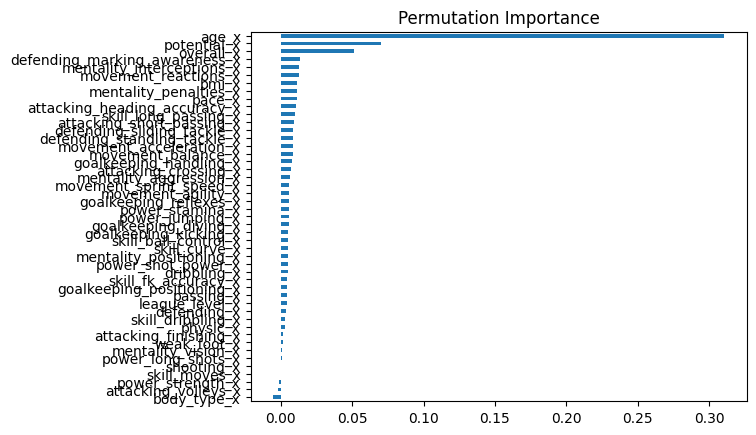

In [74]:
fl_enc_features = fl_X_test_enc.columns.tolist()
pi = pd.Series(permuter_fl.feature_importances_, fl_enc_features).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

#FL의 특성별 score을 확인합니다.
eli5.show_weights(
    permuter_fl,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=fl_enc_features)  # list 형식으로 넣어야 합니다

Weight,Feature
0.2393 ± 0.0814,age_x
0.1267 ± 0.0189,potential_x
0.0589 ± 0.0109,overall_x
0.0450 ± 0.0377,skill_dribbling_x
0.0337 ± 0.0180,power_strength_x
0.0274 ± 0.0087,goalkeeping_diving_x
0.0272 ± 0.0130,movement_reactions_x
0.0227 ± 0.0501,defending_marking_awareness_x
0.0226 ± 0.0045,goalkeeping_reflexes_x
0.0174 ± 0.0094,goalkeeping_handling_x


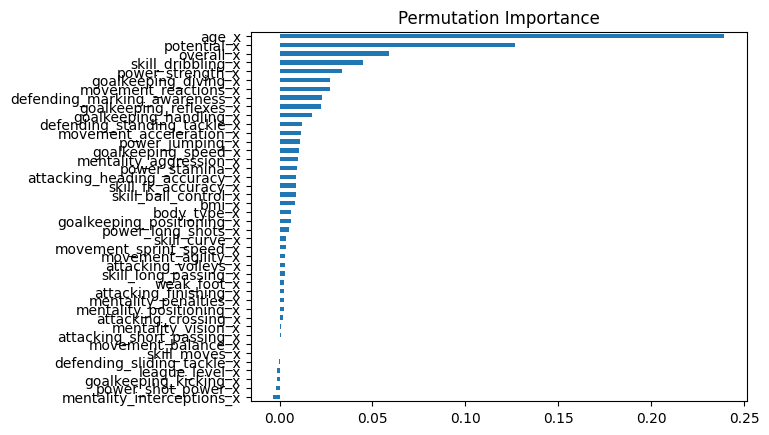

In [75]:
gk_enc_features = gk_X_test_enc.columns.tolist()
pi = pd.Series(permuter_gk.feature_importances_, gk_enc_features).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

#FL의 특성별 score을 확인합니다.
eli5.show_weights(
    permuter_gk,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=gk_enc_features)  # list 형식으로 넣어야 합니다

In [76]:
#XGboost Classification Model, Bayesian OPT
params_clf = {'xgbclassifier__max_depth': hp.quniform("max_depth", 5, 15, 1),
              'xgbclassifier__learning_rate': hp.quniform('learning_rate', 0.03, 0.08, 0.01),
              'xgbclassifier__subsample': hp.quniform('subsample', 0.6, 1.0, 0.1),
              'xgbclassifier__colsample_bytree': hp.quniform('colsample_bytree', 0.3, 0.8, 0.1),
              'xgbclassifier__n_estimators': hp.quniform('n_estimators', 200, 500, 100)}

def XGBC_pipe(params):
    params["xgbclassifier__max_depth"] = int(params["xgbclassifier__max_depth"])
    params["xgbclassifier__n_estimators"] = int(params["xgbclassifier__n_estimators"])
    XGBClassification = make_pipeline(
        XGBClassifier(
            objective="binary:logistic",
            learning_rate=params['xgbclassifier__learning_rate'],
            subsample=params['xgbclassifier__subsample'],
            n_estimators=params["xgbclassifier__n_estimators"],
            max_depth=params["xgbclassifier__max_depth"],
            colsample_bytree=params['xgbclassifier__colsample_bytree'],
            eval_metric='auc',
            n_jobs=-1))

    XGBClassification = XGBClassification.set_params(**params)
    return XGBClassification

def XGBC_fit_eval_fl(params):
    XGBClassification = XGBC_pipe(params)
    roc_auc = cross_val_score(XGBClassification, fl_X_train_clf, fl_y_train_clf, cv=4, scoring="roc_auc", error_score='raise')
    cv_roc_auc = np.mean(roc_auc)
    return {"loss": -cv_roc_auc, "status": STATUS_OK}

def XGBC_fit_eval_gk(params):
    XGBClassification = XGBC_pipe(params)
    roc_auc = cross_val_score(XGBClassification, gk_X_train_clf, gk_y_train_clf, cv=4, scoring="roc_auc", error_score='raise')
    cv_roc_auc = np.mean(roc_auc)
    return {"loss": -cv_roc_auc, "status": STATUS_OK}

trials_fl_clf = (Trials())
trials_gk_clf = (Trials()) #Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

In [77]:
# fl_best_params_clf = fmin(
#     fn=XGBC_fit_eval_fl, trials=trials_fl_clf,
#     space=params_clf, algo=tpe.suggest, max_evals=100)  #max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.

In [78]:
# gk_best_params_clf = fmin(
#     fn=XGBC_fit_eval_gk, trials=trials_gk_clf,
#     space=params_clf, algo=tpe.suggest, max_evals=100)  #max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.

In [79]:
# print("최적 하이퍼파라미터: ", trials_fl_clf.best_trial["misc"]["vals"])
# print("최적 roc_auc: ", -trials_fl_clf.best_trial["result"]["loss"])

# print("최적 하이퍼파라미터: ", trials_gk_clf.best_trial["misc"]["vals"])
# print("최적 roc_auc: ", -trials_gk_clf.best_trial["result"]["loss"])

In [80]:
#XGboost Classification Final Model
#FL Feature Importance
XGBClassification_fl = XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.05,
        subsample=0.9,
        n_estimators=500,
        max_depth=15,
        colsample_bytree=0.7000000000000001,
        eval_metric='auc',
        n_jobs=-1)

#GK Feature Importance
XGBClassification_gk = XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.03,
        subsample=0.9,
        n_estimators=300,
        max_depth=10,
        colsample_bytree=0.8,
        eval_metric='auc',
        n_jobs=-1)

acc_fl = cross_val_score(XGBClassification_fl, fl_X_train_clf, fl_y_train_clf, cv=4, scoring="accuracy", error_score='raise')
f1_fl = cross_val_score(XGBClassification_fl, fl_X_train_clf, fl_y_train_clf, cv=4, scoring="f1", error_score='raise')
roc_auc_fl = cross_val_score(XGBClassification_fl, fl_X_train_clf, fl_y_train_clf, cv=4, scoring="roc_auc", error_score='raise')
cv_acc_fl = np.mean(acc_fl)
cv_f1_fl = np.mean(f1_fl)
cv_roc_auc_fl = np.mean(roc_auc_fl)
print('---Field Player---')
print(f"Logistic Regression의 accuracy : {cv_acc_fl.round(3)}")
print(f"Logistic Regression의 f1 score : {cv_f1_fl.round(3)}")
print(f"Logistic Regression의 auc score : {cv_roc_auc_fl.round(3)}",'\n')

acc_gk = cross_val_score(XGBClassification_gk, gk_X_train_clf, gk_y_train_clf, cv=4, scoring="accuracy", error_score='raise')
f1_gk = cross_val_score(XGBClassification_gk, gk_X_train_clf, gk_y_train_clf, cv=4, scoring="f1", error_score='raise')
roc_auc_gk = cross_val_score(XGBClassification_gk, gk_X_train_clf, gk_y_train_clf, cv=4, scoring="roc_auc", error_score='raise')
cv_acc_gk = np.mean(acc_gk)
cv_f1_gk = np.mean(f1_gk)
cv_roc_auc_gk = np.mean(roc_auc_gk)
print('---GK Player---')
print(f"Logistic Regression의 accuracy : {cv_acc_gk.round(3)}")
print(f"Logistic Regression의 f1 score : {cv_f1_gk.round(3)}")
print(f"Logistic Regression의 auc score : {cv_roc_auc_gk.round(3)}")

# permuter 정의
permuter_fl_clf = PermutationImportance(
    XGBClassification_fl,  # model
    scoring="roc_auc",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42)

XGBClassification_fl.fit(fl_X_train_clf, fl_y_train_clf)

# 스코어를 다시 계산합니다.
permuter_fl_clf.fit(fl_X_test_clf, fl_y_test_clf)

# permuter 정의
permuter_gk_clf = PermutationImportance(
    XGBClassification_gk,  # model
    scoring="roc_auc",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42)

XGBClassification_gk.fit(gk_X_train_clf, gk_y_train_clf)

# 스코어를 다시 계산합니다.
permuter_gk_clf.fit(gk_X_test_clf, gk_y_test_clf)

---Field Player---
Logistic Regression의 accuracy : 0.789
Logistic Regression의 f1 score : 0.455
Logistic Regression의 auc score : 0.801 

---GK Player---
Logistic Regression의 accuracy : 0.788
Logistic Regression의 f1 score : 0.489
Logistic Regression의 auc score : 0.797


PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.8,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='auc', gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.03, max_bin=256,
                                              max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=10,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=300, n_jobs=-1,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=0,
                                              reg_alpha=0, reg_lambda=1, ...),
                      n_iter=10, random_state=42, scoring='roc_auc')

Weight,Feature
0.1410 ± 0.0081,age_x
0.0222 ± 0.0040,potential_x
0.0114 ± 0.0029,league_level_x
0.0105 ± 0.0017,overall_x
0.0055 ± 0.0018,movement_reactions_x
0.0044 ± 0.0016,defending_standing_tackle_x
0.0039 ± 0.0009,skill_ball_control_x
0.0037 ± 0.0013,attacking_short_passing_x
0.0037 ± 0.0013,bmi_x
0.0036 ± 0.0009,skill_curve_x


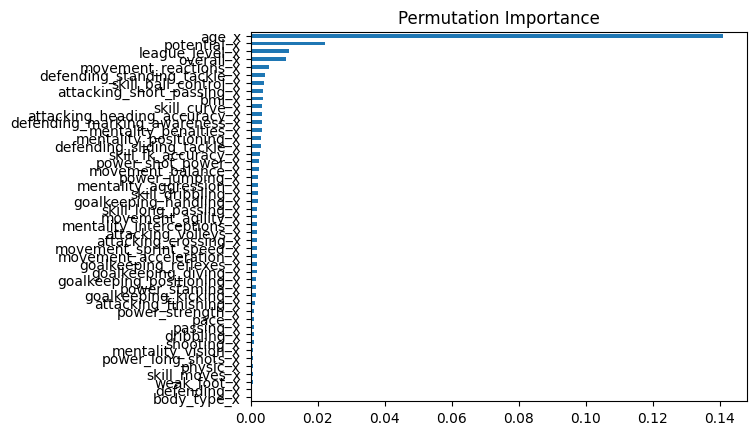

In [81]:
fl_clf_features = fl_X_test_clf.columns.tolist()
pi = pd.Series(permuter_fl_clf.feature_importances_, fl_clf_features).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

#FL의 특성별 score을 확인합니다.
eli5.show_weights(
    permuter_fl_clf,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=fl_clf_features)  # list 형식으로 넣어야 합니다

Weight,Feature
0.1320 ± 0.0428,age_x
0.0410 ± 0.0164,potential_x
0.0077 ± 0.0023,defending_marking_awareness_x
0.0074 ± 0.0051,league_level_x
0.0058 ± 0.0040,power_shot_power_x
0.0039 ± 0.0049,goalkeeping_reflexes_x
0.0036 ± 0.0026,goalkeeping_handling_x
0.0036 ± 0.0041,mentality_aggression_x
0.0034 ± 0.0009,power_strength_x
0.0030 ± 0.0032,bmi_x


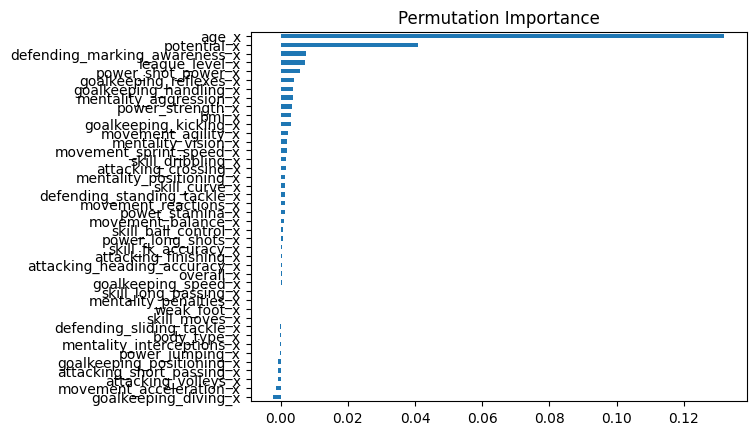

In [82]:
gk_clf_features = gk_X_test_clf.columns.tolist()
pi = pd.Series(permuter_gk_clf.feature_importances_, gk_clf_features).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

#FL의 특성별 score을 확인합니다.
eli5.show_weights(
    permuter_gk_clf,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=gk_clf_features)  # list 형식으로 넣어야 합니다

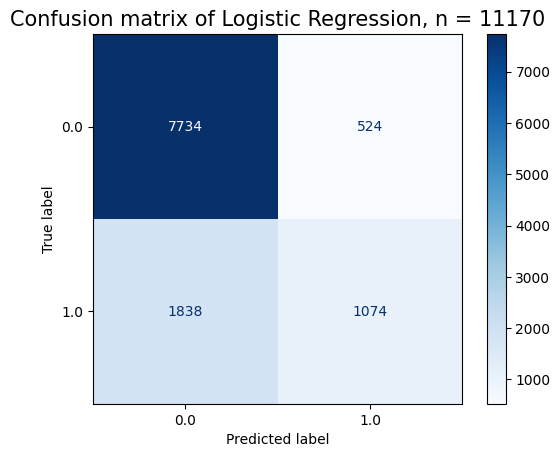

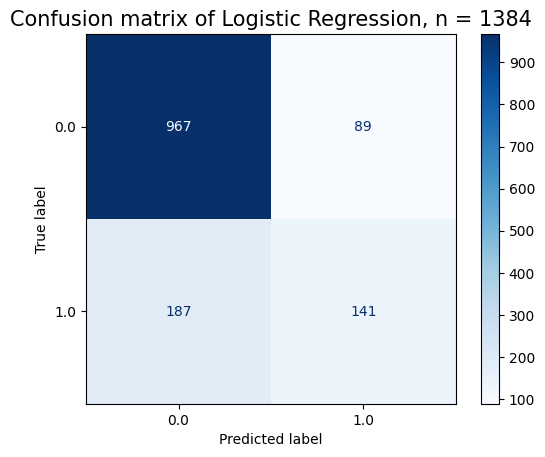

In [83]:
# threshold 최대값의 인덱스, np.argmax()
fl_y_pred_clf = XGBClassification_fl.predict(fl_X_test_clf)
gk_y_pred_clf = XGBClassification_gk.predict(gk_X_test_clf)

fpr_fl, tpr_fl, thresholds_fl = roc_curve(fl_y_test_clf, fl_y_pred_clf)
fpr_gk, tpr_gk, thresholds_gk = roc_curve(gk_y_test_clf, gk_y_pred_clf)

fig, ax = plt.subplots()
pcm_fl = plot_confusion_matrix(XGBClassification_fl, fl_X_test_clf, fl_y_test_clf,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(fl_y_test_clf)}', fontsize=15)
plt.show()

fig, ax = plt.subplots()
pcm_gk = plot_confusion_matrix(XGBClassification_gk, gk_X_test_clf, gk_y_test_clf,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(gk_y_test_clf)}', fontsize=15)
plt.show()

In [84]:
fl_y_proba_clf = XGBClassification_fl.predict_proba(fl_X_test_clf)[:,1]
gk_y_proba_clf = XGBClassification_gk.predict_proba(gk_X_test_clf)[:,1]

fpr_fl, tpr_fl, thresholds_fl = roc_curve(fl_y_test_clf, fl_y_proba_clf)
fpr_gk, tpr_gk, thresholds_gk = roc_curve(gk_y_test_clf, gk_y_proba_clf)

roc_fl = pd.DataFrame({
    'FPR(Fall-out)': fpr_fl, 
    'TPR(Recall)': tpr_fl, 
    'Threshold': thresholds_fl})

roc_gk = pd.DataFrame({
    'FPR(Fall-out)': fpr_gk, 
    'TPR(Recall)': tpr_gk, 
    'Threshold': thresholds_gk})

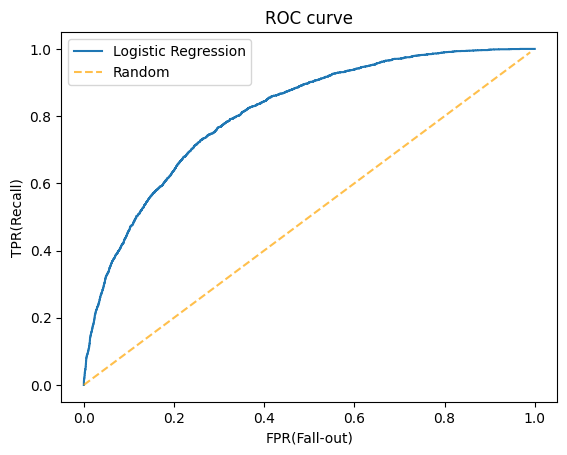

In [85]:
#FL ROC curve
plt.plot(fpr_fl, tpr_fl, label='Logistic Regression')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

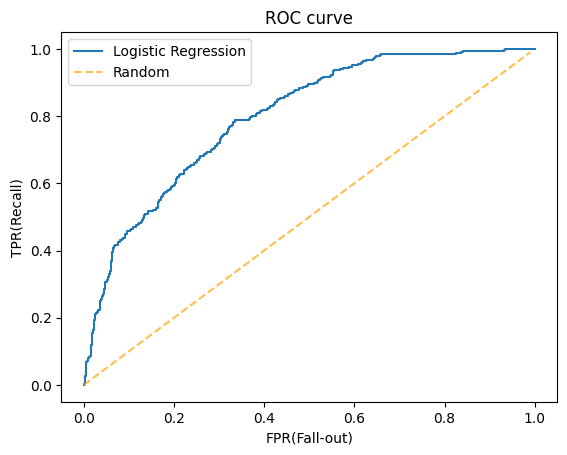

In [86]:
#GK ROC curve
plt.plot(fpr_gk, tpr_gk, label='Logistic Regression')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

idx: 1970 , threshold: 0.1204946


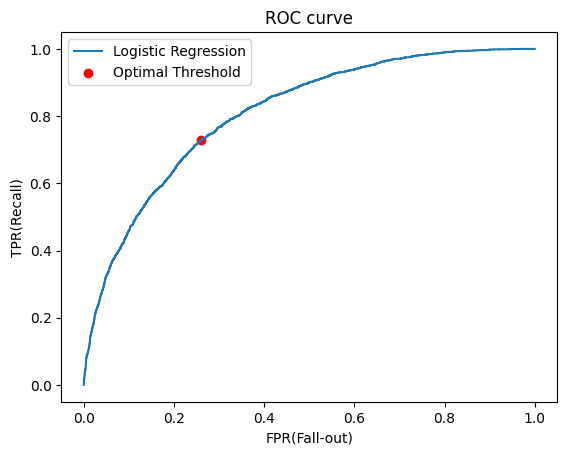

In [87]:
optimal_idx = np.argmax(tpr_fl - fpr_fl)
optimal_threshold_fl = thresholds_fl[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold_fl)

optimal_fpr_fl = roc_fl[roc_fl['Threshold'] == optimal_threshold_fl]['FPR(Fall-out)']
optimal_tpr_fl = roc_fl[roc_fl['Threshold'] == optimal_threshold_fl]['TPR(Recall)']

plt.plot(fpr_fl, tpr_fl, label='Logistic Regression')

plt.scatter(optimal_fpr_fl, optimal_tpr_fl, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

idx: 270 , threshold: 0.1583444


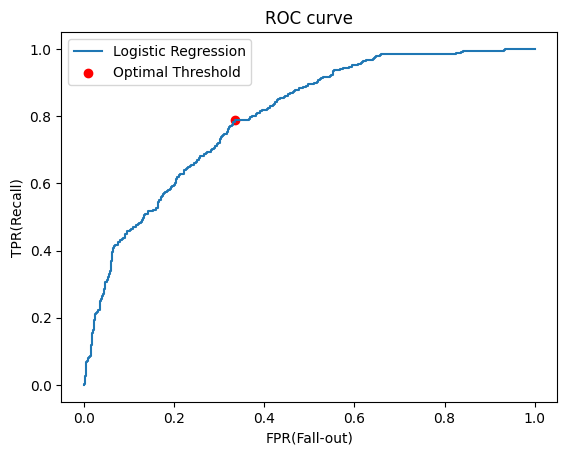

In [88]:
optimal_idx = np.argmax(tpr_gk - fpr_gk)
optimal_threshold_gk = thresholds_gk[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold_gk)

optimal_fpr_gk = roc_gk[roc_gk['Threshold'] == optimal_threshold_gk]['FPR(Fall-out)']
optimal_tpr_gk = roc_gk[roc_gk['Threshold'] == optimal_threshold_gk]['TPR(Recall)']

plt.plot(fpr_gk, tpr_gk, label='Logistic Regression')

plt.scatter(optimal_fpr_gk, optimal_tpr_gk, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [89]:
fl_y_pred_optimal = fl_y_proba_clf >= optimal_threshold_fl
print(classification_report(fl_y_test_clf, fl_y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      8258
         1.0       0.50      0.73      0.59      2912

    accuracy                           0.74     11170
   macro avg       0.69      0.73      0.70     11170
weighted avg       0.78      0.74      0.75     11170



In [90]:
gk_y_pred_optimal = gk_y_proba_clf >= optimal_threshold_gk
print(classification_report(gk_y_test_clf, gk_y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.91      0.66      0.77      1056
         1.0       0.42      0.79      0.55       328

    accuracy                           0.69      1384
   macro avg       0.67      0.73      0.66      1384
weighted avg       0.79      0.69      0.72      1384



In [91]:
acc_fl = accuracy_score(fl_y_test_clf, fl_y_pred_clf)
f1_fl = f1_score(fl_y_test_clf, fl_y_pred_clf)
auc_fl = roc_auc_score(fl_y_test_clf, fl_y_proba_clf)
print('---Field Player---')
print(f"Logistic Regression의 accuracy : {acc_fl.round(3)}")
print(f"Logistic Regression의 f1 score : {f1_fl.round(3)}")
print(f"Logistic Regression의 auc score : {auc_fl.round(3)}",'\n')

acc_gk = accuracy_score(gk_y_test_clf, gk_y_pred_clf)
f1_gk = f1_score(gk_y_test_clf, gk_y_pred_clf)
auc_gk = roc_auc_score(gk_y_test_clf, gk_y_proba_clf)
print('---GK Player---')
print(f"Logistic Regression의 accuracy : {acc_gk.round(3)}")
print(f"Logistic Regression의 f1 score : {f1_gk.round(3)}")
print(f"Logistic Regression의 auc score : {auc_gk.round(3)}")

---Field Player---
Logistic Regression의 accuracy : 0.789
Logistic Regression의 f1 score : 0.476
Logistic Regression의 auc score : 0.81 

---GK Player---
Logistic Regression의 accuracy : 0.801
Logistic Regression의 f1 score : 0.505
Logistic Regression의 auc score : 0.799


In [99]:
##XGboost Classification Model (refine)
XGBClassification_rfl = XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.05,
        subsample=0.9,
        n_estimators=500,
        max_depth=15,
        colsample_bytree=0.7000000000000001,
        eval_metric='auc',
        n_jobs=-1)

#GK Feature Importance
XGBClassification_rgk = XGBClassifier(
        objective="binary:logistic",
        learning_rate=0.03,
        subsample=0.9,
        n_estimators=300,
        max_depth=10,
        colsample_bytree=0.8,
        eval_metric='auc',
        n_jobs=-1)

acc_rfl = cross_val_score(XGBClassification_rfl, fl_X_train_rf, fl_y_train_rf, cv=4, scoring="accuracy", error_score='raise')
f1_rfl = cross_val_score(XGBClassification_rfl, fl_X_train_rf, fl_y_train_rf, cv=4, scoring="f1", error_score='raise')
roc_auc_rfl = cross_val_score(XGBClassification_rfl, fl_X_train_rf, fl_y_train_rf, cv=4, scoring="roc_auc", error_score='raise')
cv_acc_rfl = np.mean(acc_rfl)
cv_f1_rfl = np.mean(f1_rfl)
cv_roc_auc_rfl = np.mean(roc_auc_rfl)
print('---Field Player---')
print(f"Logistic Regression의 accuracy : {cv_acc_rfl.round(3)}")
print(f"Logistic Regression의 f1 score : {cv_f1_rfl.round(3)}")
print(f"Logistic Regression의 auc score : {cv_roc_auc_rfl.round(3)}",'\n')

acc_rgk = cross_val_score(XGBClassification_rgk, gk_X_train_rf, gk_y_train_rf, cv=4, scoring="accuracy", error_score='raise')
f1_rgk = cross_val_score(XGBClassification_rgk, gk_X_train_rf, gk_y_train_rf, cv=4, scoring="f1", error_score='raise')
roc_auc_rgk = cross_val_score(XGBClassification_rgk, gk_X_train_rf, gk_y_train_rf, cv=4, scoring="roc_auc", error_score='raise')
cv_acc_rgk = np.mean(acc_rgk)
cv_f1_rgk = np.mean(f1_rgk)
cv_roc_auc_rgk = np.mean(roc_auc_rgk)
print('---GK Player---')
print(f"Logistic Regression의 accuracy : {cv_acc_rgk.round(3)}")
print(f"Logistic Regression의 f1 score : {cv_f1_rgk.round(3)}")
print(f"Logistic Regression의 auc score : {cv_roc_auc_rgk.round(3)}")

# permuter 정의
permuter_rfl_rf = PermutationImportance(
    XGBClassification_rfl,  # model
    scoring="roc_auc",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42)

XGBClassification_rfl.fit(fl_X_train_rf, fl_y_train_rf)

# 스코어를 다시 계산합니다.
permuter_rfl_rf.fit(fl_X_test_rf, fl_y_test_rf)

# permuter 정의
permuter_rgk_rf = PermutationImportance(
    XGBClassification_rgk,  # model
    scoring="roc_auc",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42)

XGBClassification_rgk.fit(gk_X_train_rf, gk_y_train_rf)

# 스코어를 다시 계산합니다.
permuter_rgk_rf.fit(gk_X_test_rf, gk_y_test_rf)

---Field Player---
Logistic Regression의 accuracy : 0.777
Logistic Regression의 f1 score : 0.405
Logistic Regression의 auc score : 0.769 

---GK Player---
Logistic Regression의 accuracy : 0.765
Logistic Regression의 f1 score : 0.419
Logistic Regression의 auc score : 0.771


PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.8,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='auc', gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.03, max_bin=256,
                                              max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=10,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=300, n_jobs=-1,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=0,
                                              reg_alpha=0, reg_lambda=1, ...),
                      n_iter=10, random_state=42, scoring='roc_auc')

Weight,Feature
0.1794 ± 0.0073,age_x
0.0423 ± 0.0041,defending_x
0.0250 ± 0.0035,dribbling_x
0.0154 ± 0.0012,mentality_x
0.0142 ± 0.0023,skill_x
0.0132 ± 0.0024,passing_x
0.0125 ± 0.0023,attacking_x
0.0102 ± 0.0017,pace_x
0.0095 ± 0.0019,shooting_x
0.0091 ± 0.0019,goalkeeping_x


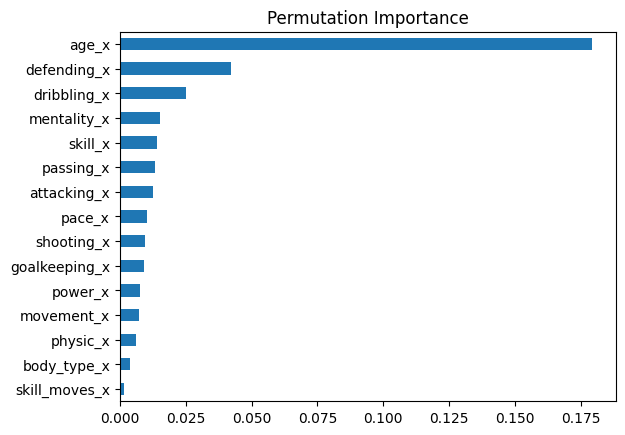

In [102]:
rfl_rf_features = fl_X_test_rf.columns.tolist()
pi = pd.Series(permuter_rfl_rf.feature_importances_, rfl_rf_features).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

#FL의 특성별 score을 확인합니다.
eli5.show_weights(
    permuter_rfl_rf,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=fl_rf_features)  # list 형식으로 넣어야 합니다

Weight,Feature
0.2067 ± 0.0324,age_x
0.1077 ± 0.0237,goalkeeping_x
0.0288 ± 0.0105,movement_x
0.0218 ± 0.0085,attacking_x
0.0189 ± 0.0074,power_x
0.0153 ± 0.0076,defending_x
0.0127 ± 0.0078,skill_x
0.0108 ± 0.0079,mentality_x
0.0067 ± 0.0043,body_type_x
0 ± 0.0000,skill_moves_x


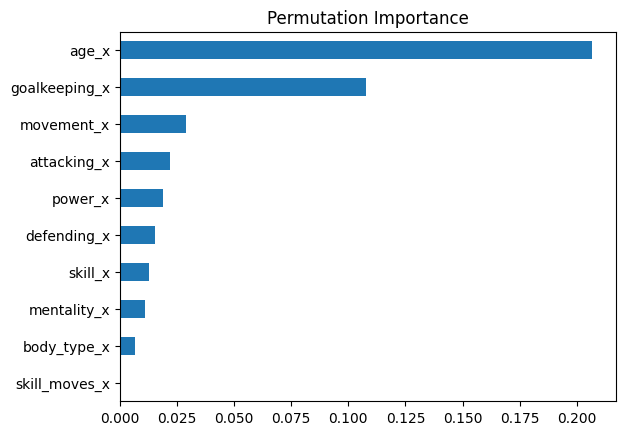

In [104]:
rgk_rf_features = gk_X_test_rf.columns.tolist()
pi = pd.Series(permuter_rgk_rf.feature_importances_, rgk_rf_features).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

#gk의 특성별 score을 확인합니다.
eli5.show_weights(
    permuter_rgk_rf,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=rgk_rf_features)  # list 형식으로 넣어야 합니다